In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

Exploratory Data Analysis
Tables
    -Any days wo sales? -No
    -Nan vals? -No
    -Negative and zero prices? -Yes, 1 (to be removed)
    -Present basic stats (Done)
        -# of cat
        -# of shops
        -# of months
        -# of items
        -length of training data
        -length of test data
    -Top 5 products (Done)
    -Top 5 items (Done)
    -Top 5 shops (Done)
Graphs
    -Sale/month (Done)
    -Count/month (Done)
    -Sales/shop (Done)
    -Sales/category (Done)
    -Item sell frequency (Done)
    -Price ranges histogram (Done)
    
    

In [48]:

train = pd.read_csv('data/sales_train.csv', encoding='utf8')
test = pd.read_csv('data/test.csv', encoding='utf8')
item_cat = pd.read_csv('data/item_categories.csv', encoding='utf8')
items = pd.read_csv('data/items.csv', encoding='utf8')
shops = pd.read_csv('data/shops.csv', encoding='utf8')

#print(train)
#print(item_cat)
#print(items)
#print(shops)
print(test)

            ID  shop_id  item_id
0            0        5     5037
1            1        5     5320
2            2        5     5233
3            3        5     5232
4            4        5     5268
...        ...      ...      ...
214195  214195       45    18454
214196  214196       45    16188
214197  214197       45    15757
214198  214198       45    19648
214199  214199       45      969

[214200 rows x 3 columns]


Data analysis

In [46]:
#Basic statistics
print(f"Number of categories: {len(item_cat)}")
print(f"Number of shops: {len(shops)}")
n_months = train['date_block_num'].max()+1
print(f"Number of months (train): {n_months}")
print(f"Number of items: {len(items)}")
print(f"Length of train data: {len(train)}")
print(f"Length of test data: {len(test)}")

Number of categories: 84
Number of shops: 60
Number of months (train): 34
Number of items: 22170
Length of train data: 2935849
Length of test data: 214200


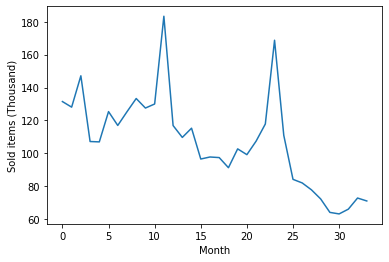

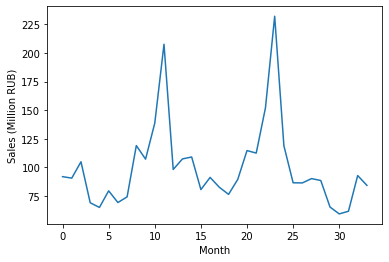

In [65]:
#Sales-time-series

#Plot of monthly sale
train['sales'] = train['item_cnt_day'].mul(train['item_price'])
train_monthly = train.groupby("date_block_num").sum()
#print(train_monthly)

sns.lineplot(data=train_monthly['item_cnt_day']/1000)
plt.xlabel('Month')
plt.ylabel('Sold items (Thousand)')
plt.savefig('pics/item_cnt_month.png',bbox_inches='tight')
plt.figure()
sns.lineplot(data=train_monthly['sales']/1000000)
plt.xlabel('Month')
plt.ylabel('Sales (Million RUB)')
plt.savefig('pics/sales_month.png',bbox_inches='tight')

plt.show()


In [28]:
#Negative counts?
#Refund OR SCRAPPING??
neg_cnt = train.loc[train['item_cnt_day'] < 0]
print(f'Number of negative cnt entries: {len(neg_cnt)}')
min_neg_cnt = neg_cnt['item_cnt_day'].min()
print(f'Min neg cnt: {min_neg_cnt}')


Number of negative cnt entries: 7356
Min neg cnt: -22.0


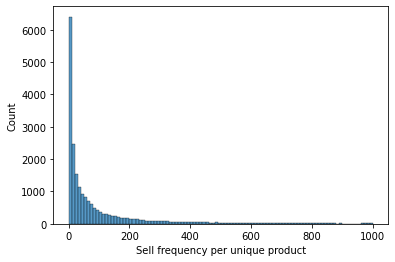

187642.0
-11.0


In [44]:
occurance_df = train.groupby("item_id").sum() #count()
#print(occurance_df)
plt.figure()
sns.histplot(occurance_df,x='item_cnt_day',binwidth=10,binrange=(0,1000))
plt.xlabel("Sell frequency per unique product")
plt.savefig('pics/sell_fq_id.png',bbox_inches='tight')
plt.show()
print(occurance_df['item_cnt_day'].max())
print(occurance_df['item_cnt_day'].min())
#Focus on sales of low price items?


           date_block_num   shop_id     item_id    item_price  item_cnt_day
int_price                                                                  
-100.0                  4        32        2973 -1.000000e+00           1.0
 0.0              2340677   5208047  2178835322  9.499310e+06      338607.0
 100.0            6291098  17209234  6698131604  8.409238e+07      531434.0
 200.0            6180390  14752063  4296100352  1.251756e+08      485469.0
 300.0            5524185  13561085  4863955972  1.533037e+08      487617.0
...                   ...       ...         ...           ...           ...
 42900.0              132        79       53612  1.719600e+05           4.0
 49700.0               24        12        7241  4.978200e+04           1.0
 50900.0               14        25       13199  5.099900e+04           1.0
 59200.0                8        12       11365  5.920000e+04           1.0
 307900.0              11        12        6066  3.079800e+05           1.0

[319 rows x

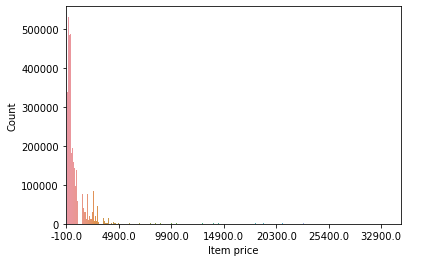

531434.0
1.0


In [19]:
#add rows = count of a price tag, then histogram plot
train['int_price'] = np.ceil(train['item_price'])
train['int_price'] = train['int_price']- train['int_price']%100
t_price = train.groupby("int_price").sum()
print(t_price)
#mean_sale = t_price["item_cnt_day"].mean()
plt.figure()
sns.barplot(data=t_price,x=t_price.index,y='item_cnt_day')
plt.xlabel("Item price")
plt.ylabel('Count')
xticks=plt.gca().xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%50==0:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)
#plt.xticks(ticks) 
plt.savefig('pics/price_fq.png',bbox_inches='tight')
plt.show()
print(t_price['item_cnt_day'].max())
print(t_price['item_cnt_day'].min())

In [61]:
#Price analysis

#How many items are extreamly overpriced???
#How many items <1rub in price???
#No Nan values

expensivest_item = train['item_price'].max()
sheapest_item = train['item_price'].min()
print(f'Most expensive item: {expensivest_item}')
print(f'Sheapest item: {sheapest_item}')

#Nans? No
print(train.isnull().values.any())
print(test.isnull().values.any())

#Drop this item
low_price = train.loc[train['item_price'] <= 0]
print(f"#item price 0: {len(low_price)} ")
print(low_price)
test.loc[test['item_id']==2973]

n_neg_cnt = len(train.loc[train['item_cnt_day']<0])
print(f'Negative item counts: {n_neg_cnt}')


Most expensive item: 307980.0
Sheapest item: -1.0
False
False
#item price 0: 1 
              date  date_block_num  shop_id  item_id  item_price  item_cnt_day
484683  15.05.2013               4       32     2973        -1.0           1.0
Negative item counts: 7356


In [29]:
train.sort_values(by='item_price')

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0000,1.0
608763,08.06.2013,5,58,11865,0.0700,1.0
579766,11.06.2013,5,6,11864,0.0700,1.0
611400,08.06.2013,5,58,20146,0.0875,4.0
673155,31.07.2013,6,6,11872,0.0900,1.0
...,...,...,...,...,...,...
2910156,29.10.2015,33,12,13403,42990.0000,1.0
2327159,29.01.2015,24,12,7241,49782.0000,1.0
1488135,20.03.2014,14,25,13199,50999.0000,1.0
885138,17.09.2013,8,12,11365,59200.0000,1.0


In [11]:
#Check if sales occur every day

def valid_date_sale(year,month,day):
    short_months = [4,6,9,11]
    if(month == 2 and day>28):
        return False
    elif(month in short_months and day>30):
        return False
    elif(not train["date"].where(train["date"]==f"{day}.{month}.{year}").empty):
        return False
    return True
    
    
    

train["date"]
years = [2013,2014,2015]
months = np.arange(1,13)
days = np.arange(1,32)
no_sale_dates = []
for year in years:
    for month in months:
        for day in days:
            if(valid_date_sale(year,month,day)):
                no_sale_dates.append(f"{day}.{month}.{year}")

#Takes 5min to run
#no Nan
#sales every day!
print(no_sale_dates)


[]


[' ', ' ', ' ', ' ', ' ', ' ', 'Воронеж (Плехановская, 13)', 'Воронеж ТРЦ "Максимир"', ' ', ' ', ' ', ' ', 'Интернет-магазин ЧС', ' ', ' ', 'Калуга ТРЦ "XXI век"', 'Коломна ТЦ "Рио"', ' ', 'Красноярск ТЦ "Июнь"', 'Курск ТЦ "Пушкинский"', ' ', 'Москва МТРЦ "Афи Молл"', 'Москва Магазин С21', ' ', 'Москва ТК "Буденовский" (пав.К7)', 'Москва ТРК "Атриум"', 'Москва ТЦ "Ареал" (Беляево)', 'Москва ТЦ "МЕГА Белая Дача II"', 'Москва ТЦ "МЕГА Теплый Стан" II', ' ', ' ', 'Москва ТЦ "Семеновский"', ' ', ' ', ' ', 'Н.Новгород ТРЦ "Фантастика"', ' ', ' ', 'Омск ТЦ "Мега"', ' ', ' ', ' ', 'СПб ТК "Невский Центр"', 'СПб ТК "Сенная"', ' ', ' ', 'Сергиев Посад ТЦ "7Я"', 'Сургут ТРЦ "Сити Молл"', ' ', ' ', 'Тюмень ТЦ "Гудвин"', ' ', ' ', ' ', 'Химки ТЦ "Мега"', ' ', 'Чехов ТРЦ "Карнавал"', 'Якутск Орджоникидзе, 56', 'Якутск ТЦ "Центральный"', ' ']


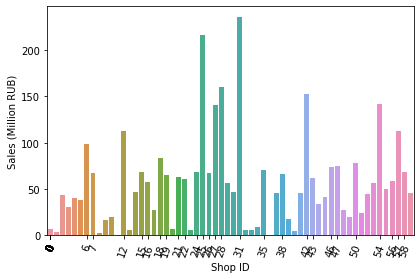

In [3]:
#Sales per store
train['sales'] = train['item_cnt_day'].mul(train['item_price'])
train_shop = train.groupby("shop_id").sum()/1000000

mean_sale = train_shop["sales"].mean()
ticks = [i if(sale>mean_sale) else 0 for i,sale in enumerate(train_shop['sales'])]
txt_ticks = [name if ticks[i]!=0 else " " for i,name in enumerate(shops['shop_name'])]
print(txt_ticks)
sns.barplot(data=train_shop,x=train_shop.index,y="sales")
plt.xticks(rotation=70)
plt.tight_layout()
plt.xlabel('Shop ID')
plt.ylabel('Sales (Million RUB)')
plt.xticks(ticks) 
#plt.gca().set_xticklabels(txt_ticks)
plt.savefig('pics/sales_store.png',bbox_inches='tight')
plt.show()

                   item_id      sales
item_category_id                     
0                 0.054209   0.000263
1                 0.011346   0.000431
2                 0.557610  43.564474
3                 0.207866  62.553530
4                 0.074536   1.332177
...                    ...        ...
79                0.017717  17.200826
80                0.055494   8.360800
81                0.093463   0.175741
82                0.106802   0.336266
83                0.331380   1.189234

[84 rows x 2 columns]


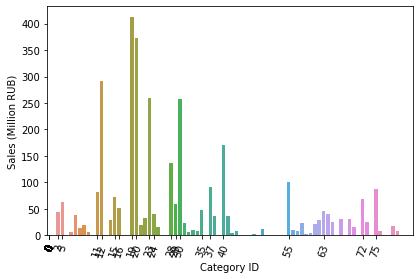

In [42]:
#Sales per category
train['sales'] = train['item_cnt_day'].mul(train['item_price'])
train_id = train.groupby("item_id").sum()
items['sales'] = train_id['sales']
items_cat = items.groupby("item_category_id").sum()/1000000
print(items_cat)


mean_sale = items_cat["sales"].mean()
ticks = [i if(sale>mean_sale) else 0 for i,sale in enumerate(items_cat["sales"])]
#txt_ticks = [name if ticks[i]!=0 else " " for i,name in enumerate(shops['shop_name'])]
#print(txt_ticks)
sns.barplot(data=items_cat,x=items_cat.index,y="sales")
plt.xticks(rotation=70)
plt.tight_layout()
plt.xlabel('Category ID')
plt.ylabel('Sales (Million RUB)')
plt.xticks(ticks) 
#plt.gca().set_xticklabels(txt_ticks)
plt.savefig('pics/sales_cat.png',bbox_inches='tight')
plt.show()


In [31]:
#Top 5 shops!
ind = train_shop.sort_values('sales',ascending=False).head(5).index.to_numpy()
#shops.where(shops['shop_id'] == 0)
print(ind)
best_shops = [shops.loc[shops['shop_id'] == shop_id].iloc[0,0] for shop_id in ind]
print(best_shops)
train_shop.sort_values('sales',ascending=False).head(5)

[31 25 28 42 54]
['Москва ТЦ "Семеновский"', 'Москва ТРК "Атриум"', 'Москва ТЦ "МЕГА Теплый Стан" II', 'СПб ТК "Невский Центр"', 'Химки ТЦ "Мега"']


,date_block_num,item_id,item_price,item_cnt_day,sales
shop_id,,,,,
31,3.519304,2613.938432,170.763434,0.310777,235.217019
25,2.803911,2017.578669,155.557554,0.241920,216.480571
28,2.106668,1503.076500,125.294704,0.184557,159.746337
42,1.762898,1149.534465,101.551477,0.144934,151.917033
54,1.700597,1575.568395,109.669430,0.185790,141.939673


In [66]:
#Top 5 products
id_ind=train.groupby('item_id').sum().sort_values('sales',ascending=False).head(5).index.to_numpy()
print(id_ind)
best_items = [items.loc[items['item_id'] == name].iloc[0,0] for name in id_ind]
print(best_items)
train.groupby('item_id').sum().sort_values('sales',ascending=False).head(5)

[ 6675  3732 13443  3734  3733]
['Sony PlayStation 4 (500 Gb) Black (CUH-1008A/1108A/B01)', 'Grand Theft Auto V [PS3, русские субтитры]', 'Комплект Sony PS4 (500 Gb) Black (CUH-1108A/B01) + игра Grand Theft Auto V', 'Grand Theft Auto V [Xbox 360, русские субтитры]', 'Grand Theft Auto V [PS4, русские субтитры]']


,date_block_num,shop_id,item_price,item_cnt_day,sales
item_id,,,,,
6675,91466,162043,1.132643e+08,10289.0,2.193915e+08
3732,96917,201958,1.756505e+07,16642.0,4.361798e+07
13443,19720,27479,2.135946e+07,1366.0,3.433125e+07
3734,89106,187755,1.589006e+07,11688.0,3.106516e+07
3733,57006,70210,8.951195e+06,6506.0,2.229886e+07


In [43]:
#Top 5 categories
cat_ind = items_cat.sort_values('sales',ascending=False).head(5).index.to_numpy()
#shops.where(shops['shop_id'] == 0)
print(cat_ind)
best_shops = [item_cat.loc[item_cat['item_category_id'] == idz].iloc[0,0] for idz in cat_ind]
print(best_shops)
items_cat.sort_values('sales',ascending=False).head(5)

[19 20 12 23 30]
['Игры - PS3', 'Игры - PS4', 'Игровые консоли - PS4', 'Игры - XBOX 360', 'Игры PC - Стандартные издания']


,item_id,sales
item_category_id,,
19,3.536428,412.050281
20,0.893347,373.010312
12,0.228536,292.239762
23,2.548805,259.619128
30,5.989227,257.519291
